Neste notebook você vai resolver alguns exercícios, cada um composto de várias etapas.

---

# **Lista de Exercícios**

Esta lista tem por objetivo colocar a mão na massa e relembrar os conceitos que foram passados nas aulas anteriores.

<center><img src="https://images.unsplash.com/photo-1542903660-eedba2cda473?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1050&q=80" height="400px"></center>


# **Exercício 1**

* Importar o pacote Pandas
* importar os dados de ocorrências da aviação civil neste link
* Ver qual o tamanho (linhas x colunas) do *DataFrame*
* Verificar as 5 primeiras

**Importe o Pandas e importe os dados de ocorrências da aviação civil que se encontram em `csv` [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/ocorrencias_aviacao.csv).**

In [1]:
import pandas as pd

df = pd.read_csv('ocorrencias_aviacao.csv')

**Veja qual o tamanho (linhas e colunas) do conjunto de dados importado.**

In [2]:
df.shape

(5208, 22)

**Identifique o tipo de cada coluna (inteiro, float, object).**

In [3]:
df.dtypes

codigo_ocorrencia                   int64
ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

**Veja as 3 primeiras entradas do conjunto de dados.**

In [4]:
df.head(3)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


**Veja quantos valores únicos existem para a coluna `ocorrencia_classificacao`**

In [5]:
df['ocorrencia_classificacao'].unique()

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

**Descubra qual Estado possui o maior número de ocorrências com aeronaves civis.**

In [6]:
numero_ocorrencias_estado = df['ocorrencia_uf'].value_counts(sort=True)
numero_ocorrencias_estado[:1]

ocorrencia_uf
SP    1207
Name: count, dtype: int64

**Quantos por cento das ocorrências são do tipo `FALHA DO MOTOR EM VOO`?**

In [7]:
tipo_ocorrencia = "FALHA DO MOTOR EM VOO"
ocorrencias_pelo_tipo_selecionado = df[df['ocorrencia_tipo'] == tipo_ocorrencia]

print(f"{len(ocorrencias_pelo_tipo_selecionado) / len(df['ocorrencia_tipo']) * 100:.2f}% das ocorrências são do tipo: {tipo_ocorrencia}")

13.10% das ocorrências são do tipo: FALHA DO MOTOR EM VOO


# **Exercício 2**

Você irá trabalhar agora com os dados da ação BBAS3, do Banco do Brasil na BOVESPA.

Na variável `df_bbas3`, foi importado [este arquivo `csv`](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/BBAS3.SA.csv), onde o *index* do *DataFrame* representa os valores da ação para determinado dia. Responda as perguntas abaixo.

In [8]:
# importar pandas
import pandas as pd

# importar o csv com dados da BBAS3
df_bbas3 = pd.read_csv("BBAS3.SA.csv", index_col="Date")

**Veja as 5 primeiras entradas da variável `df_bbas3`.**

In [9]:
df_bbas3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-06,49.470001,49.669998,49.180000,49.369999,46.886795,6314800.0
2019-05-07,49.080002,49.680000,48.220001,49.490002,47.000763,10846100.0
2019-05-08,49.500000,50.840000,49.500000,50.590000,48.045422,14459600.0
2019-05-09,50.910000,51.259998,50.119999,51.029999,48.463291,15377500.0
2019-05-10,51.099998,51.189999,49.860001,50.160000,47.637051,8975300.0


**Quais são os valores da ação para o dia 04 de outubro de 2019?**

In [10]:
df_bbas3.loc['2019-10-04']

Open         4.537000e+01
High         4.560000e+01
Low          4.462000e+01
Close        4.560000e+01
Adj Close    4.444867e+01
Volume       7.228200e+06
Name: 2019-10-04, dtype: float64

**Qual a média do Volume financeiro movimentado em todo o período?**

In [11]:
df_bbas3['Volume'].mean()

14052947.368421054

# **Exercício 3**

Você irá trabalhar agora com os dados do projeto +BIKE, usado em aulas passadas.

Na variável df_bike, foi importado [este arquivo csv](http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv).



In [12]:
# importar pandas
import pandas as pd
import matplotlib.pyplot as plt

# importar o csv com dados da BBAS3
df_bike = pd.read_csv("df_rides.csv")

# ver as primeiras entradas
df_bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


**Qual a porcentagem de valores ausentes para a coluna `user_gender`?**


In [13]:
user_gender_ausente = df_bike[df_bike['user_gender'].isna()]

print(f"{len(user_gender_ausente) / len(df_bike) * 100:.2f}%")

0.14%


**Preencha a coluna `user_gender` com o valor mais frequente.**

In [14]:
valor_mais_frequente = df_bike['user_gender'].mode()[0]
df_bike['user_gender'] = df_bike['user_gender'].fillna(valor_mais_frequente)

**Plote u boxplot para a coluna `ride_duration`.**

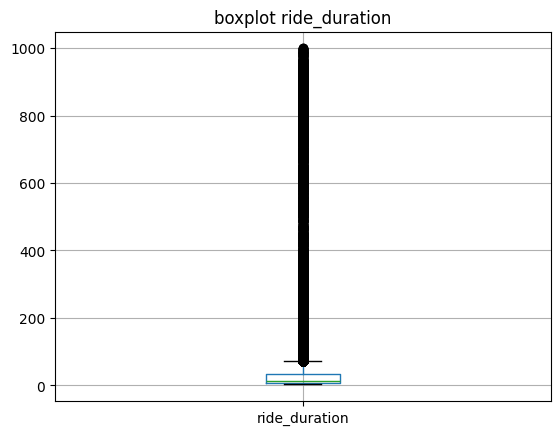

In [15]:
coluna_selecionada = 'ride_duration'

boxplot = df_bike.boxplot(column=coluna_selecionada)
plt.plot()
plt.title(f'boxplot {coluna_selecionada}')
plt.show()